# Import Data

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv('data.csv',encoding="ISO-8859-1")
data.head()

C:\Users\onero\AppData\Local\Temp\ipykernel_8832\1071361731.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv',encoding="ISO-8859-1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Clean Data

In [70]:
data.drop(['stn_code', 'sampling_date', 'agency','location_monitoring_station'], axis=1, inplace=True)
data.reset_index(drop=True)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data["type"].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [72]:
cleaning_map = {
    'Residential, Rural and other Areas': 'Residential',
    'Residential and others': 'Residential',
    'RIRUO': 'Residential',
    'Industrial Area': 'Industrial',
    'Industrial Areas': 'Industrial',
    'Sensitive Area': 'Sensitive',
    'Sensitive Areas': 'Sensitive'
}

data['type'] = data['type'].replace(cleaning_map)

print(data)

                              state   location         type   so2   no2  \
0                    Andhra Pradesh  Hyderabad  Residential   4.8  17.4   
1                    Andhra Pradesh  Hyderabad   Industrial   3.1   7.0   
2                    Andhra Pradesh  Hyderabad  Residential   6.2  28.5   
3                    Andhra Pradesh  Hyderabad  Residential   6.3  14.7   
4                    Andhra Pradesh  Hyderabad   Industrial   4.7   7.5   
...                             ...        ...          ...   ...   ...   
435737                  West Bengal   ULUBERIA  Residential  22.0  50.0   
435738                  West Bengal   ULUBERIA  Residential  20.0  46.0   
435739  andaman-and-nicobar-islands        NaN          NaN   NaN   NaN   
435740                  Lakshadweep        NaN          NaN   NaN   NaN   
435741                      Tripura        NaN          NaN   NaN   NaN   

         rspm  spm  pm2_5        date  
0         NaN  NaN    NaN  1990-02-01  
1         NaN  NaN 

In [73]:
data.drop(index=[435739,435740,435741],inplace=True)

In [74]:
columns_to_fill = ['so2', 'no2','rspm','spm','pm2_5']  # Specify the columns you want to fill

# Fill NaN values in the specified columns with their respective means
for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].mean())

In [75]:
data.dropna(inplace=True)
data.head()
data.reset_index(drop=True)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...
430340,West Bengal,ULUBERIA,Residential,20.0,44.0,148.000000,220.78348,40.791467,2015-12-15
430341,West Bengal,ULUBERIA,Residential,17.0,44.0,131.000000,220.78348,40.791467,2015-12-18
430342,West Bengal,ULUBERIA,Residential,18.0,45.0,140.000000,220.78348,40.791467,2015-12-21
430343,West Bengal,ULUBERIA,Residential,22.0,50.0,143.000000,220.78348,40.791467,2015-12-24


In [ ]:
data.to_csv("clean_data.csv")

# Calculate SI

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv("clean_data.csv")
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [12]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [13]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
430340,148.0,122.666667
430341,131.0,117.000000
430342,140.0,120.000000
430343,143.0,121.000000
430344,171.0,130.333333


In [14]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
430340,220.78348,180.52232
430341,220.78348,180.52232
430342,220.78348,180.52232
430343,220.78348,180.52232
430344,220.78348,180.52232


In [15]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['date','state','si','ni','rpi','spi','AQI']]
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


In [16]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)

In [17]:
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


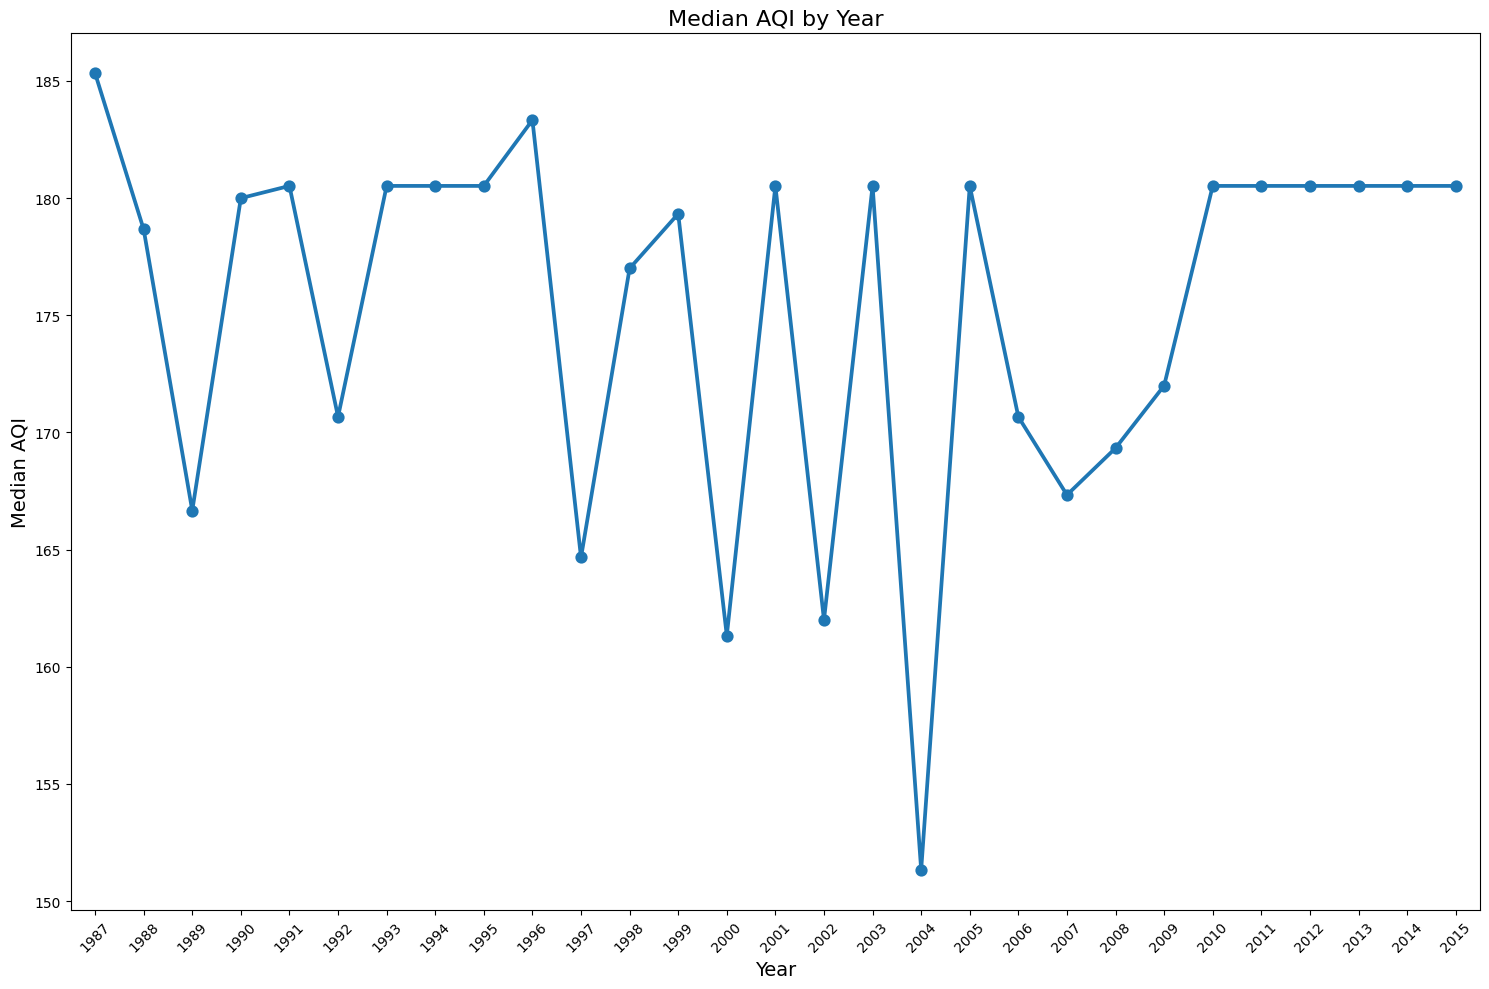

In [18]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the date column
data['year'] = data['date'].dt.year

# Filter rows where year is valid (non-NaN)
data = data[data['year'].notna()]

# Convert 'AQI' to numeric, coercing invalid values to NaN
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Drop rows with NaN in 'AQI' column
data = data.dropna(subset=['AQI'])

# Ensure 'AQI' is a numeric type
data['AQI'] = data['AQI'].astype(float)

# Group by 'year' and calculate median for numeric columns
df = data[['AQI', 'year']].groupby('year').median().reset_index()

# Sort by year in descending order
df = df.sort_values(by='year', ascending=False)

# Plotting
f, ax = plt.subplots(figsize=(15, 10))
sns.pointplot(x='year', y='AQI', data=df)
ax.set_title('Median AQI by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Median AQI', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

C:\Users\onero\AppData\Local\Temp\ipykernel_21636\4064763646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df['date'])


,AQI,date
430325,180.52232,2015-10-23
430326,180.52232,2015-10-28
430327,180.52232,2015-10-31
430328,180.52232,2015-11-05
430329,180.52232,2015-11-07
430330,180.52232,2015-11-10
430331,180.52232,2015-11-11
430332,180.52232,2015-11-16
430333,180.52232,2015-11-20
430334,180.52232,2015-11-26


In [20]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

C:\Users\onero\AppData\Local\Temp\ipykernel_21636\2822222202.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=df.set_index('date').resample('M')["AQI"].mean()


date
1987-01-31    259.563812
1987-02-28    253.636467
1987-03-31    322.938366
1987-04-30    227.085685
1987-05-31    336.653480
Freq: ME, Name: AQI, dtype: float64

In [21]:
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,259.563812
1,1987-02-28,253.636467
2,1987-03-31,322.938366
3,1987-04-30,227.085685
4,1987-05-31,336.653480


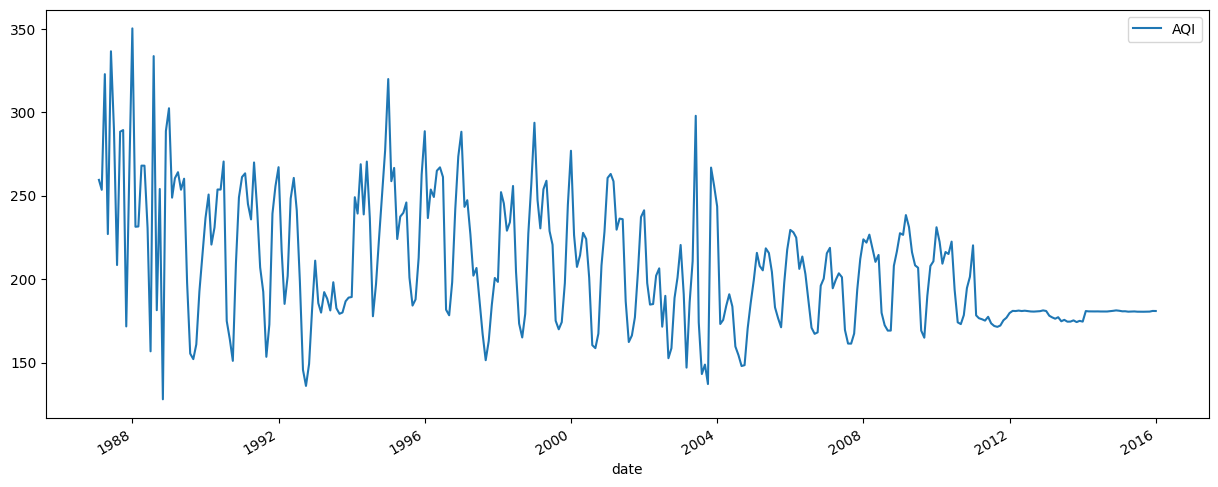

In [22]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

# Predict Model

In [138]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['AQI'])
print('ADF Statistic:', result[0])
print('p-value:', result[1]) 


ADF Statistic: -3.289800186608074
p-value: 0.015340608460801847


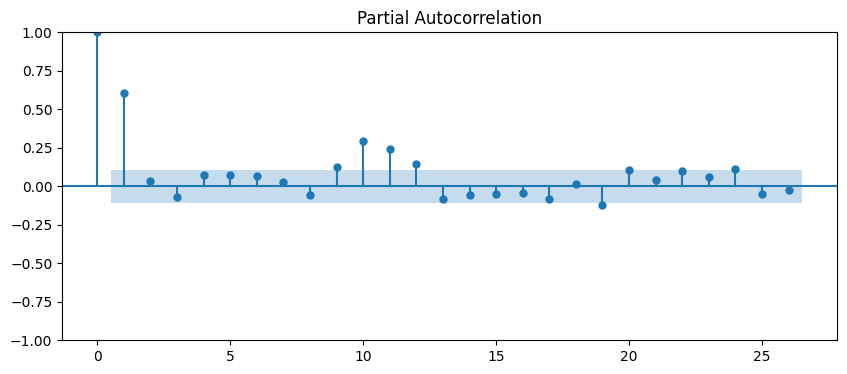

In [139]:
#Auto Regressive (p)
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.tsa.stattools import pacf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_pacf(df['AQI'].dropna(), method = 'ols')
df_pacf = pacf(df['AQI'].dropna(), method = 'ols')

In [140]:
import numpy as np

for i in range(0, len(df_pacf)):
    if df_pacf[i] < 1.96 / np.sqrt(len(df['AQI'])):
        print('p= ', i - 1)
        break

p=  1


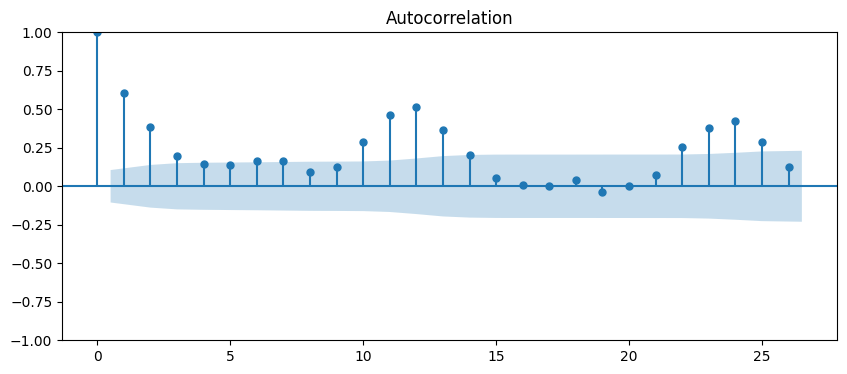

In [141]:
#Moving Average (q)
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.tsa.stattools import acf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_acf(df['AQI'], fft = True)
df_acf = acf(df['AQI'], fft = True)

In [142]:
for i in range(0, len(df_acf)):
    if df_acf[i] < 1.96 / np.sqrt(len(df['AQI'])):
        print('q=', i - 1)
        break

q= 7


In [143]:
#Test order
import itertools

p = range(2, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
print(pdq)

from statsmodels.tsa.arima_model import ARIMA

aic = []

for param in pdq:
    try:
        model = ARIMA(df['AQI'].dropna(), order = param)
        results = model.fit()
        print('Order = {}'.format(param))
        print('AIC = {}'.format(results.aic))
        a = 'Order: '+str(param) +' AIC: ' + str(results.aic)
        aic.append(a)
    except:
        continue

[(2, 1, 0), (2, 1, 1), (2, 1, 2)]


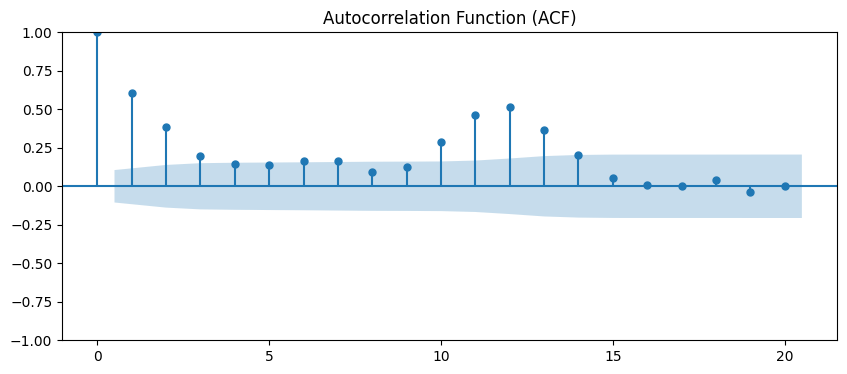

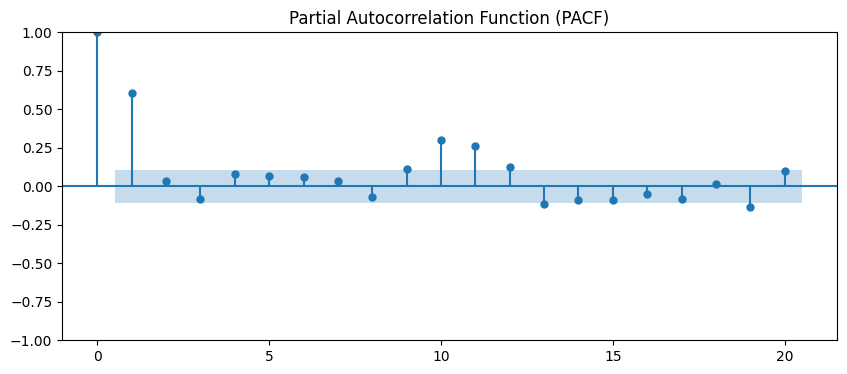

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['AQI'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plot_pacf(df['AQI'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [149]:
train_size = int(len(df) * 0.8)  # ใช้ 80% เป็น train และ 20% เป็น test
train, test = df['AQI'][:train_size], df['AQI'][train_size:]

In [183]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['AQI'], order=(2, 0, 1))
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                  346
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1677.219
Date:                Tue, 19 Nov 2024   AIC                           3364.438
Time:                        17:10:09   BIC                           3383.670
Sample:                             0   HQIC                          3372.096
                                - 346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.4889      5.274     39.338      0.000     197.151     217.827
ar.L1         -0.0701      0.308     -0.228      0.820      -0.674       0.533
ar.L2          0.4461      0.167      2.667      0.0

c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\onero\Desktop\Dumb\swu\indian-air\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\onero\AppData\Local\Temp\ipykernel_21636\38495384.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label="Forecast", color='red')


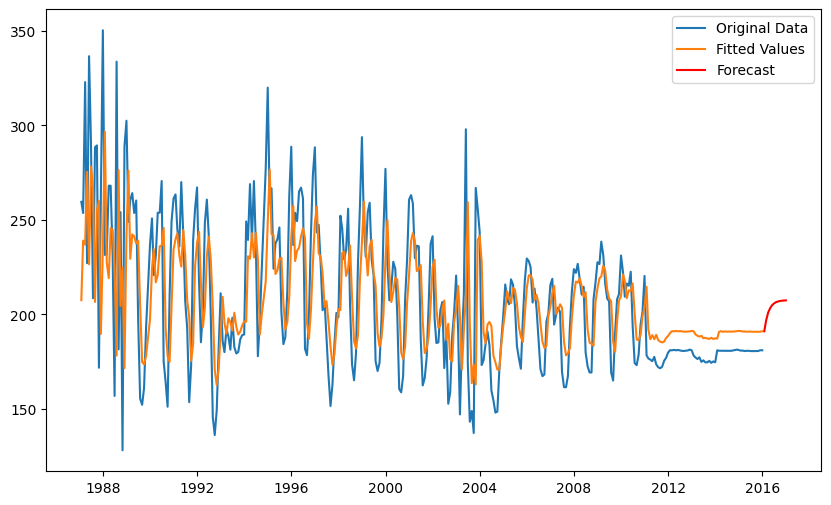

In [184]:
df['fitted'] = fitted_model.fittedvalues

# Out-of-sample prediction
forecast_steps = 12
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['AQI'], label="Original Data")
plt.plot(df['fitted'], label="Fitted Values")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label="Forecast", color='red')
plt.legend()
plt.show()

In [185]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['AQI'][1:], df['fitted'][1:])
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 947.1238303348606, RMSE: 30.775377013691653


In [186]:
df

,AQI,fitted
date,,
1987-01-31,259.563812,207.488950
1987-02-28,253.636467,239.052470
1987-03-31,322.938366,236.840182
1987-04-30,227.085685,275.396550
1987-05-31,336.653480,226.480800
...,...,...
2015-08-31,180.528217,190.757000
2015-09-30,180.563329,190.755323
2015-10-31,180.607299,190.774310
